In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [15]:
train_dir = 'Training/'
test_dir = 'Testing/'

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary')

Found 2870 images belonging to 4 classes.


In [18]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary')

Found 394 images belonging to 4 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [21]:
egitim = model.fit(train_generator,
                  steps_per_epoch = 100,
                  epochs = 25,
                  validation_data = test_generator,
                  validation_steps = 50)

Epoch 1/25


C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.2883 - loss: -30608626.0000 - val_accuracy: 0.2919 - val_loss: -2700274432.0000
Epoch 2/25
  2/100 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3438 - loss: -2540793344.0000

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.2950 - loss: -73957842944.0000 - val_accuracy: 0.2919 - val_loss: -807397883904.0000
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.2808 - loss: -5175183409152.0000 - val_accuracy: 0.2919 - val_loss: -54192978788352.0000
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.2834 - loss: -121432440832000.0000 - val_accuracy: 0.2919 - val_loss: -437995865899008.0000
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.2973 - loss: -786566083510272.0000 - val_accuracy: 0.2919 - val_loss: -3170026777477120.0000
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.2773 - loss: -5731509839331328.0000 - val_accuracy: 0.2919 - val_loss: -10947059888685056.0000
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.2632 - loss: -19190740659732480.0000 - val_accuracy: 0.2919 - val_loss: -43271829866938368.0000
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/s

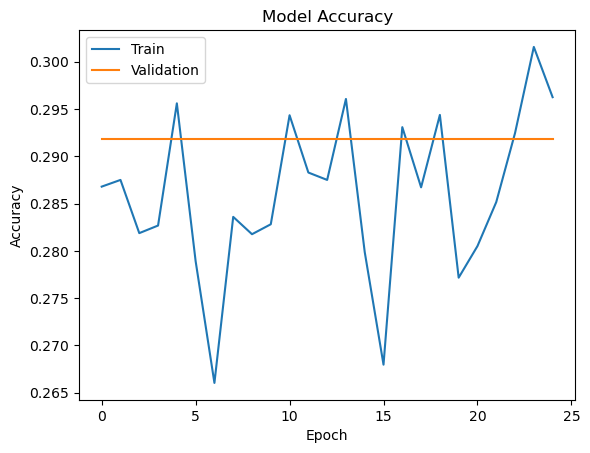

In [24]:
import matplotlib.pyplot as plt

plt.plot(egitim.history['accuracy'])
plt.plot(egitim.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
train_accuracy = egitim.history['accuracy'][-1]

In [26]:
print("Eğitim doğruluğu:", train_accuracy)

Eğitim doğruluğu: 0.29624998569488525
